In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

## 1. Tensor 연산

이번 과제에서 우리가 풀 문제는 다음과 같습니다.

Pytorch DOCS 자료를 참조해 Tensor 연산을 수행하는 과제입니다.

Pytorch DOCS : https://pytorch.org/docs/stable/torch.html




1) 2개 tensor 입력를 대상으로 아래의 사칙 연산을 수행하세요.

수행 연산 : +, -

In [ ]:
input1 = torch.randn((4, 3), dtype=torch.float32)
input2 = torch.randn((4, 3), dtype=torch.float32)

result1 = input1-input2
result2 = input1+input2

print(result1)
print(result1.shape)

print(result2)
print(result2.shape)

tensor([[ 0.5279,  2.0108,  0.7409],
        [ 0.6023,  1.0578, -0.1711],
        [ 1.3217,  3.4510, -1.5859],
        [ 0.0967, -0.6630, -1.5189]])
torch.Size([4, 3])
tensor([[-1.4855,  0.5549,  1.8295],
        [ 0.0865,  1.9470, -0.3450],
        [ 1.9863, -0.6135, -0.4728],
        [-1.0580, -0.4397, -1.3845]])
torch.Size([4, 3])


2) 2개 tensor 입력으로 대상으로 아래의 사칙 연산을 수행하시오.

수행 연산 : *(곱셈 연산 - 행렬 곱셈 연산과 다름)

In [ ]:
input1 = torch.randn((4, 1), dtype=torch.float32)
input2 = torch.randn((4, 3), dtype=torch.float32)

result1 = input1 * input2

print(result1)
print(result1.shape)

tensor([[-0.7192,  0.7348, -1.8903],
        [-0.0761,  1.4848, -0.3615],
        [ 3.1656, -0.9373,  1.3348],
        [-0.1175, -2.0194,  1.2522]])
torch.Size([4, 3])


3) 4x3 차원의 행렬과 3x10 차원의 행렬을 대상으로 행렬 곱셈해서 4x10 차원의 행렬을 생성하시오.

hint : torch.m?

In [ ]:
input1 = torch.randn((4, 3), dtype=torch.float32)
input2 = torch.randn((3, 10), dtype=torch.float32)

result1 = torch.mm(input1, input2)

print(result1)
print(result1.shape)

tensor([[-3.5548,  0.6368, -0.0949, -1.1608,  0.0201, -2.6102, -1.8558,  1.0794,
         -2.3785,  1.9460],
        [-0.6016, -0.4075,  0.0550, -0.1714,  0.0263, -1.6572, -0.7777,  0.0058,
         -0.3319,  0.4712],
        [ 2.8709, -0.0844, -0.2975,  0.4181,  0.1567,  5.0339,  3.0445,  0.1478,
          2.0854, -1.9771],
        [-3.5509, -0.9157, -0.6630, -2.3226,  0.5660, -1.5168, -0.3699,  2.7121,
         -1.6079,  1.6577]])
torch.Size([4, 10])


4) 4x3 차원의 행렬 4개와 3x10 차원의 행렬 4개를 대상으로 행렬 곱셈 연산을 수행하시오.

두 행렬은 batch 크기가 4인 행렬이다.

행렬 곱셈을 수행하는 경우 배치 행렬 곱셈을 수행하시오.

hint : torch.bm?


In [ ]:
input1 = torch.randn((4, 4, 3), dtype=torch.float32)
input2 = torch.randn((4, 3, 10), dtype=torch.float32)

result1 = torch.bmm(input1, input2)

print(result1)
print(result1.shape)

tensor([[[ 7.4062e-01,  2.1835e-01,  8.4544e-01,  2.1345e+00, -1.3805e-02,
          -1.4948e+00,  1.3911e+00, -5.3691e-01,  1.7600e-01,  1.2423e+00],
         [-9.4434e-01, -6.2349e-01, -6.5162e-01,  3.3973e-01, -7.9203e-01,
          -7.2719e-02,  6.7331e-02,  6.2161e-02,  9.9942e-01, -8.3427e-01],
         [ 5.6503e-01, -1.2270e+00,  7.5940e-01, -1.6685e+00,  9.4660e-01,
           2.7455e+00, -2.0707e+00,  4.3720e-02, -1.1612e+00, -4.2914e-01],
         [-1.0511e+00, -4.3816e-01, -7.4037e-01,  1.0411e+00, -1.0728e+00,
          -8.3804e-01,  6.8882e-01, -2.4962e-02,  1.3732e+00, -6.5960e-01]],

        [[-2.8912e-01, -8.2767e-01, -2.4510e-01,  2.5118e+00, -1.5047e-01,
          -2.0375e+00,  3.0453e-01, -1.3739e+00, -3.0371e-01, -1.0466e+00],
         [-1.0647e-01, -9.5448e-01,  3.6774e-01,  2.7320e+00,  1.0091e+00,
          -3.1700e-01,  4.4135e-01, -7.9121e-01,  1.9643e+00, -1.7008e+00],
         [-8.5869e-01,  4.9260e-01,  1.9041e-01,  3.8558e-01, -1.0139e+00,
          -1.0525

5)  4x3 차원의 행렬이 3개가 존재하며, 3개의 행렬의 합쳐서 3x4x3 차원의 행렬을 생성하고자 한다.

위의 행렬 연산을 수행하시오.

hint : torch.st***

In [ ]:
input1 = torch.randn((4, 3), dtype=torch.float32)
input2 = torch.randn((4, 3), dtype=torch.float32)
input3 = torch.randn((4, 3), dtype=torch.float32)

result1 = torch.stack([input1, input2, input3], dim = 0)

print(result1)
print(result1.shape)

tensor([[[ 0.5896, -0.3433, -1.1346],
         [-0.5142, -0.7566,  0.3402],
         [ 0.2973, -0.5082,  0.8862],
         [ 0.3529, -0.5429,  1.0955]],

        [[-0.6719, -2.1322,  0.5639],
         [-0.1292,  0.8852,  0.1698],
         [-1.1627, -0.2371,  0.3540],
         [ 0.2584,  0.4869,  0.7794]],

        [[ 1.5860,  1.1163,  0.5274],
         [ 0.5596, -0.6452,  0.3545],
         [-0.1340, -2.5416, -0.4809],
         [-0.2081,  2.0490,  0.8925]]])
torch.Size([3, 4, 3])


6) 4x3 차원의 행렬과 4x6 차원의 행렬이 이어붙져 4x9 차원의 행렬을 생성하고자 한다.

위의 행렬 연산을 수행하시오.

hint : torch.c**

In [ ]:
input1 = torch.randn((4, 3), dtype=torch.float32)
input2 = torch.randn((4, 6), dtype=torch.float32)

result1 = torch.cat((input1, input2), 1)

print(result1)
print(result1.shape)

tensor([[ 1.5965, -0.7239, -0.5969,  2.2214,  1.3144, -0.4603, -0.3476, -1.3268,
          0.6539],
        [-1.8753, -1.2687, -1.0366,  0.5755,  0.2880,  0.9401, -0.1185, -0.4443,
          0.1436],
        [-1.8435, -0.1439, -0.6026, -1.0193,  0.2207, -0.6759,  0.0058,  0.4319,
         -1.5006],
        [ 0.2282, -0.2122,  2.7762,  0.2558, -1.5034, -0.5118, -0.5449,  0.8347,
          0.5396]])
torch.Size([4, 9])


7) 3x4x8 차원의 행렬을 값은 동일하지만 2번째 차원과 3번째 차원이 바뀐 3x8x4 차원의 행렬을 구하고자 한다.

위의 행렬 연산을 수행하시오.

hint : torch.tr*******

In [ ]:
input1 = torch.randn((3, 4, 8), dtype=torch.float32)

result1 = torch.transpose(input1, 1, 2)

print(result1)
print(result1.shape)

tensor([[[ 6.5438e-01,  6.2815e-01,  1.0758e+00, -1.3949e+00],
         [ 1.8761e+00,  4.5067e-01, -4.1657e-01,  7.6207e-01],
         [-7.9066e-01, -3.3575e-01,  1.2596e+00, -4.2085e-01],
         [-2.1512e+00,  1.0818e+00,  5.3784e-01,  3.7414e-01],
         [ 7.1967e-02, -7.7448e-02,  5.3206e-01, -6.8514e-01],
         [-1.4674e+00,  1.6027e+00,  9.6302e-01, -1.9596e-01],
         [ 2.8856e-01, -1.4047e+00,  4.9035e-01,  8.1016e-02],
         [ 7.7422e-01,  1.3929e+00, -3.4992e-01, -1.1752e+00]],

        [[-5.3330e-01,  9.3799e-01,  9.7446e-01, -6.0970e-02],
         [-7.0713e-01, -3.1308e-02,  4.2428e-01, -1.1656e+00],
         [ 1.3100e+00, -1.2528e+00,  9.1901e-01, -2.1198e-01],
         [-1.4611e+00, -4.5479e-01, -9.2421e-01, -2.0369e-01],
         [ 4.4659e-01, -2.6532e-02,  1.0750e+00, -1.2504e+00],
         [-5.2276e-01,  5.9382e-02, -1.4934e-01, -1.7914e+00],
         [-7.6233e-01, -9.6573e-03, -1.1136e-03, -1.0597e+00],
         [-4.0699e-01, -9.5463e-02,  7.9641e-01, -9.5

8) 3x8 차원의 행렬을 대상으로 1번째 차원의 행렬 평균을 구하시오.

해당 연산을 수행하면 3차원의 행렬을 구할 수 있으며, 3개의 값은 8가지 값의 평균을 구한 값이다.

In [ ]:
input1 = torch.randn((3, 8), dtype=torch.float32)

result1 = input1.mean(dim=1)

print(result1)
print(result1.shape)

tensor([ 0.5526, -0.0558, -0.4101])
torch.Size([3])


## 2. 신경망 모델로 CIFAR10 분류 수행

이번 과제에서 수행할 작업은 신경망 모델로 CIFAR10을 분류하는 작업입니다.

수행해야할 작업은 아래와 같습니다.

1) 평가 데이터 정의

2) 모델 정의

3) 손실함수와 Optimizer 정의

4) Loss 계산 및 모델 최적화를 위한 코드를 호출

1) 평가 데이터 정의

CIFAR10을 학습용으로 호출한 코드를 참조하여 평가 데이터를 정의하시오.

평가 데이터의 경우 데이터 호출시 매개변수 train=False가 되어야하며, 로드 정의 시 shuffle=False가 된다.

그 외의 파라미터는 동일하다.


In [120]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


아래의 코드는 호출된 데이터셋을 시각화하는 코드입니다.
평가 데이터가 제대로 호출되었는지 확인할 수 있습니다.

torch.Size([4, 3, 32, 32])
torch.Size([4])


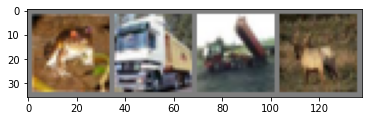

frog  truck truck deer 


In [121]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(testloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

2) 모델 정의

데이터를 학습 및 추론하기 위한 모델을 정의하시오.

모델의 구조는 아래의 그림과 동일한 구조를 구현하시오.

각 Layer의 뉴런 수는 자유롭게 설정

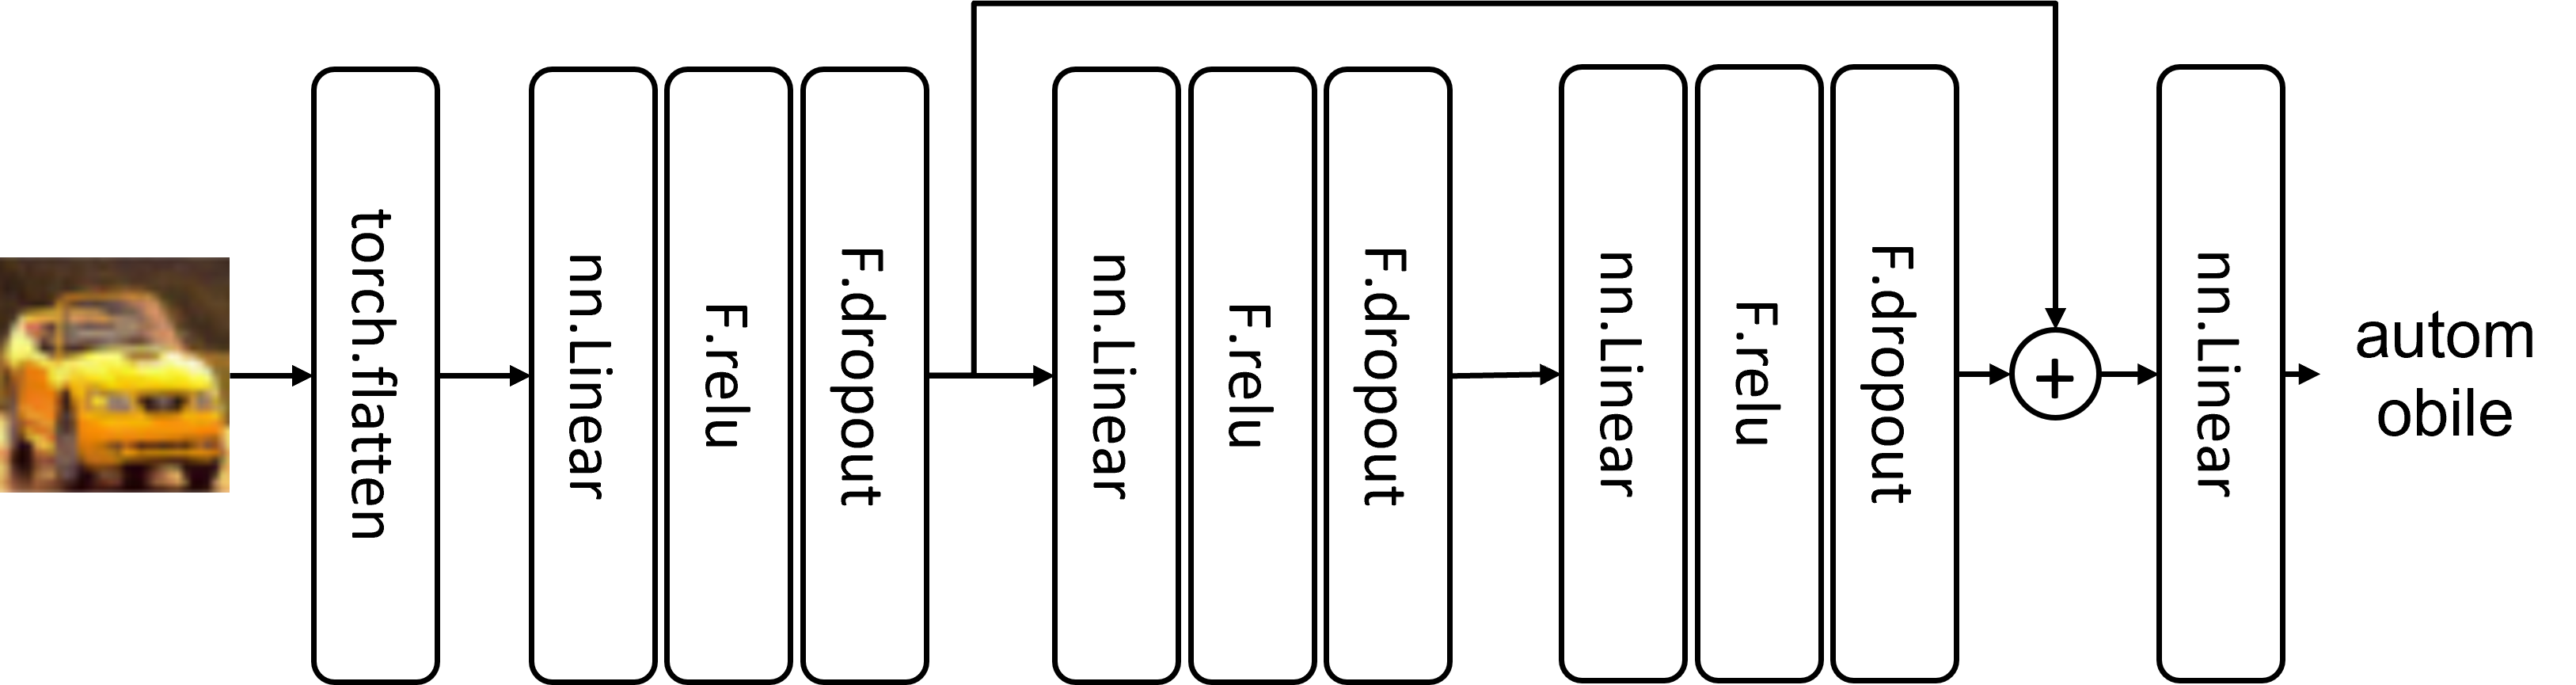



In [122]:
dropout_p = 0.2

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1024*3, 400)
        self.fc2 = nn.Linear(400, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)
        self.dropout_p = dropout_p


    def forward(self, x):

        x = torch.flatten(x, 1)

        #Layer1
        x = F.relu(self.fc1(x))
        y = F.dropout(x, training=self.training, p=self.dropout_p)

        #Layer2
        x = F.relu(self.fc2(y))
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        m = nn.AdaptiveMaxPool1d(120)  #parameter개수를 줄이고, 성능 개선을 위해 max pooling 진행(다음 layer에게 알맞게 전달되기 위한 인자 크기 사용)
        x = m(x)

        #Layer3
        x = F.relu(self.fc3(x))
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        m = nn.AdaptiveMaxPool1d(84)
        x = m(x)

        #sum(Layer1 + Layer3)
        m = nn.AdaptiveMaxPool1d(84)
        y = m(y)
        x += y

        #Linear
        x = self.fc4(x)
        output = x
        return output

net = Net()
net = net.cuda()
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
)


3) 손실함수와 Optimizer 정의

손실함수는 CrossEntropyLoss, Optimizer는 SGD 옵티마이저를 정의하시오.
SGD의 학습률은 0.001, 모멘텀은 0.9이다.

In [123]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = 0.9)

4) Loss 계산 및 모델 최적화를 위한 코드를 호출

Loss를 대상으로 역전파 함수를 호출하고 모델을 최적화하시오.

In [124]:
for epoch in range(4):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.902
[1,  4000] loss: 1.763
[1,  6000] loss: 1.726
[1,  8000] loss: 1.701
[1, 10000] loss: 1.702
[1, 12000] loss: 1.660
[2,  2000] loss: 1.615
[2,  4000] loss: 1.615
[2,  6000] loss: 1.603
[2,  8000] loss: 1.612
[2, 10000] loss: 1.606
[2, 12000] loss: 1.616
[3,  2000] loss: 1.561
[3,  4000] loss: 1.507
[3,  6000] loss: 1.568
[3,  8000] loss: 1.559
[3, 10000] loss: 1.552
[3, 12000] loss: 1.580
[4,  2000] loss: 1.501
[4,  4000] loss: 1.497
[4,  6000] loss: 1.512
[4,  8000] loss: 1.510
[4, 10000] loss: 1.520
[4, 12000] loss: 1.519
Finished Training


아래의 코드는 성능 평가와 결과 시각화를 위한 코드입니다.

In [125]:
net = net.cpu()
net.eval()

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy of the network on the 10000 test images: 55 %
Accuracy for class: plane is 49.9 %
Accuracy for class: car   is 74.7 %
Accuracy for class: bird  is 26.5 %
Accuracy for class: cat   is 28.3 %
Accuracy for class: deer  is 63.1 %
Accuracy for class: dog   is 50.6 %
Accuracy for class: frog  is 71.9 %
Accuracy for class: horse is 53.1 %
Accuracy for class: ship  is 75.5 %
Accuracy for class: truck is 62.6 %
